In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver

f:\MAIN\VS CODE\LangGraph\lg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from dotenv import load_dotenv
from langgraph.graph.message import add_messages
load_dotenv()
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")


def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [4]:
graph = StateGraph(ChatState)

checkpoint=MemorySaver()

thread_id=1
# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)


chatbot = graph.compile(checkpointer=checkpoint)  

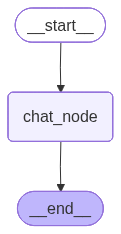

In [5]:
chatbot

In [8]:
thread_id='1'

while True:
    user_message=input("Type Here: ")

    print('User Message: ',user_message)

    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    
    config = {'configurable':{'thread_id': thread_id}}

    response=chatbot.invoke({'messages':[HumanMessage(content=user_message)]},config=config)

    print('AI:',response['messages'][-1].content)

User Message:  hi
AI: Hi there! How can I help you today?
User Message:  my name is mohan
AI: Hi Mohan, it's nice to meet you!

How can I help you today?
User Message:  could you tell my name 
AI: Yes, your name is Mohan.

It's nice to meet you, Mohan! How can I help you today?
User Message:  thank  you bye
AI: You're welcome, Mohan! Goodbye for now.

Feel free to reach out if you need anything else in the future!
User Message:  
AI: You're welcome, Mohan! Goodbye!
User Message:  bye


In [9]:
s="Hello hi exit"
print(s.strip().lower())
print(s.lower())

hello hi exit
hello hi exit
